In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### How does the code perform?

In [2]:
pf = pd.read_csv('perf.csv')
pf = pf[['nlines','processed_time']]

In [3]:
lm = np.polyfit(pf.nlines, pf.processed_time, 1)
lm

array([  2.57848333e-05,   3.17044523e-02])

In [4]:
x = np.arange(0,510000,100000)
y = x*lm[0] + lm[1]

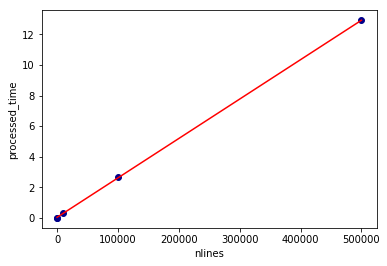

In [5]:
pf.plot.scatter(x='nlines', y='processed_time',  c='DarkBlue', s=35)
plt.plot(x, y, '-', c='Red')

Because the performance scales linearly, one can split a large file into many smaller files, and process them in parallel and distributed way.

### What is Harvoni for?


https://www.drugs.com/harvoni.html

<img src=harvoni.jpg/>

In [6]:
df = pd.read_csv('top_cost_drug-500k.txt')

In [7]:
x=df.head(15)[['drug_name','total_cost']].sort_index(ascending=False)

In [8]:
x

,drug_name,total_cost
14,XARELTO,2.877651e+07
13,SENSIPAR,2.924247e+07
12,ABILIFY,3.029243e+07
11,LYRICA,3.199746e+07
10,ENBREL,3.524224e+07
9,NEXIUM,3.543758e+07
8,LANTUS,3.731856e+07
7,RENVELA,4.059754e+07
6,JANUVIA,4.090811e+07
5,ADVAIR DISKUS,4.659865e+07


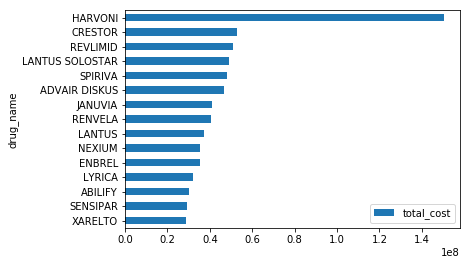

In [9]:
x.plot.barh(x='drug_name',y='total_cost')